# Imports

In [1]:
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

In [2]:
df = pd.read_csv('Data/data.csv')

# Data Inspection and Initial Cleaning

In [3]:
df.head()

,action_type,combined_shot_type,game_event_id,game_id,lat,loc_x,loc_y,lon,minutes_remaining,period,...,shot_type,shot_zone_area,shot_zone_basic,shot_zone_range,team_id,team_name,game_date,matchup,opponent,shot_id
0,Jump Shot,Jump Shot,10,20000012,33.9723,167,72,-118.1028,10,1,...,2PT Field Goal,Right Side(R),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,1
1,Jump Shot,Jump Shot,12,20000012,34.0443,-157,0,-118.4268,10,1,...,2PT Field Goal,Left Side(L),Mid-Range,8-16 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,2
2,Jump Shot,Jump Shot,35,20000012,33.9093,-101,135,-118.3708,7,1,...,2PT Field Goal,Left Side Center(LC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,3
3,Jump Shot,Jump Shot,43,20000012,33.8693,138,175,-118.1318,6,1,...,2PT Field Goal,Right Side Center(RC),Mid-Range,16-24 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,4
4,Driving Dunk Shot,Dunk,155,20000012,34.0443,0,0,-118.2698,6,2,...,2PT Field Goal,Center(C),Restricted Area,Less Than 8 ft.,1610612747,Los Angeles Lakers,2000-10-31,LAL @ POR,POR,5


In [4]:
len(df.columns)

25

In [5]:
df.columns

Index(['action_type', 'combined_shot_type', 'game_event_id', 'game_id', 'lat',
       'loc_x', 'loc_y', 'lon', 'minutes_remaining', 'period', 'playoffs',
       'season', 'seconds_remaining', 'shot_distance', 'shot_made_flag',
       'shot_type', 'shot_zone_area', 'shot_zone_basic', 'shot_zone_range',
       'team_id', 'team_name', 'game_date', 'matchup', 'opponent', 'shot_id'],
      dtype='object')

In [6]:
def columns_info(df):
    columns_df = pd.DataFrame({'nulls': [df[col].isna().sum() for col in df.keys()], 
                         'dtype': [df[col].dtype for col in df.keys()], 
                         'nunique_values': [df[col].nunique() for col in df.keys()], 
                         'unique_values': [df[col].unique()for col in df.keys()], 
                         'value_counts': [df[col].value_counts() for col in df.keys()]}, 
                         index=[col for col in df.keys()])
    return columns_df

In [7]:
df.shape

(30697, 25)

In [8]:
columns_info(df)

,nulls,dtype,nunique_values,unique_values,value_counts
action_type,0,object,57,"[Jump Shot, Driving Dunk Shot, Layup Shot, Run...",Jump Shot 18880 La...
combined_shot_type,0,object,6,"[Jump Shot, Dunk, Layup, Tip Shot, Hook Shot, ...",Jump Shot 23485 Layup 5448 Dunk ...
game_event_id,0,int64,620,"[10, 12, 35, 43, 155, 244, 251, 254, 265, 294,...",2 132 4 106 11 96 17 93 8 ...
game_id,0,int64,1559,"[20000012, 20000019, 20000047, 20000049, 20000...",21501228 50 20200069 47 20500591 46 2...
lat,0,float64,457,"[33.9723, 34.0443, 33.9093, 33.8693, 34.0553, ...",34.0443 5599 34.0373 246 34.0323 22...
loc_x,0,int64,489,"[167, -157, -101, 138, 0, -145, 1, -65, -33, -...",0 5475 1 272 138 148 108 ...
loc_y,0,int64,457,"[72, 0, 135, 175, -11, 28, 108, 125, 238, 127,...",0 5599 7 246 12 225 3 21...
lon,0,float64,489,"[-118.1028, -118.4268, -118.3708, -118.1318, -...",-118.2698 5475 -118.2688 272 -118.1318 ...
minutes_remaining,0,int64,12,"[10, 7, 6, 9, 8, 3, 1, 11, 2, 0, 5, 4]",0 3866 4 2855 3 2839 2 2834 1 ...
period,0,int64,7,"[1, 2, 3, 4, 5, 6, 7]",3 8296 1 8048 4 7260 2 6718 5 ...


### Dropping Features that will not be used in models
- several "ID" features are unique identifiers for game, event, and shot. These are not important for modeling. 
- several features descripting coordinates on the court will be dropped. 
    - this information overlaps with two other features `shot_distance` and `shot_type`

In [9]:
df.drop(columns=['game_event_id', 'game_id', 'lat', 'loc_x', 
                 'loc_y', 'lon', 'shot_id', 'team_id', 'team_name'], axis=1, inplace=True)

In [10]:
df.drop(index=df[pd.isna(df.shot_made_flag)].index, inplace=True)
df.reset_index(drop=True, inplace=True)

In [11]:
df.to_csv('Data/data_cleaned.csv', index=False)

In [12]:
df = pd.read_csv('Data/data_cleaned.csv')

In [13]:
df.shape

(25697, 16)

In [14]:
columns_info(df)

,nulls,dtype,nunique_values,unique_values,value_counts
action_type,0,object,55,"[Jump Shot, Driving Dunk Shot, Layup Shot, Run...",Jump Shot 15836 Layup...
combined_shot_type,0,object,6,"[Jump Shot, Dunk, Layup, Tip Shot, Hook Shot, ...",Jump Shot 19710 Layup 4532 Dunk ...
minutes_remaining,0,int64,12,"[10, 7, 6, 9, 8, 3, 1, 11, 2, 0, 5, 4]",0 3248 4 2408 2 2379 3 2377 1 ...
period,0,int64,7,"[1, 2, 3, 4, 5, 6, 7]",3 7002 1 6700 4 6043 2 5635 5 ...
playoffs,0,int64,2,"[0, 1]","0 21939 1 3758 Name: playoffs, dtype: i..."
season,0,object,20,"[2000-01, 2001-02, 2002-03, 2003-04, 2004-05, ...",2005-06 1924 2002-03 1852 2008-09 185...
seconds_remaining,0,int64,60,"[22, 45, 52, 19, 32, 12, 36, 56, 0, 9, 44, 16,...",0 833 1 541 2 508 4 480 28 ...
shot_distance,0,int64,74,"[15, 16, 22, 0, 14, 12, 25, 17, 9, 5, 20, 18, ...",0 4608 25 1631 24 1263 17 1225 18...
shot_made_flag,0,float64,2,"[0.0, 1.0]",0.0 14232 1.0 11465 Name: shot_made_flag...
shot_type,0,object,2,"[2PT Field Goal, 3PT Field Goal]",2PT Field Goal 20285 3PT Field Goal 541...


In [15]:
df.groupby('season')['shot_made_flag'].value_counts()

season   shot_made_flag
1996-97  0.0                221
         1.0                162
1997-98  0.0                461
         1.0                349
1998-99  0.0                414
         1.0                351
1999-00  0.0                708
         1.0                604
2000-01  0.0                840
         1.0                735
2001-02  0.0                925
         1.0                783
2002-03  0.0               1044
         1.0                808
2003-04  0.0                777
         1.0                594
2004-05  0.0                635
         1.0                492
2005-06  0.0               1051
         1.0                873
2006-07  0.0                856
         1.0                723
2007-08  0.0                967
         1.0                852
2008-09  0.0                985
         1.0                866
2009-10  0.0                968
         1.0                804
2010-11  0.0                842
         1.0                679
2011-12  0.0    

In [16]:
df.season.value_counts().sort_index()

1996-97     383
1997-98     810
1998-99     765
1999-00    1312
2000-01    1575
2001-02    1708
2002-03    1852
2003-04    1371
2004-05    1127
2005-06    1924
2006-07    1579
2007-08    1819
2008-09    1851
2009-10    1772
2010-11    1521
2011-12    1416
2012-13    1328
2013-14      59
2014-15     593
2015-16     932
Name: season, dtype: int64

In [17]:
df['year'] = [x[:4] for x in df.game_date]

In [18]:
df.year.value_counts().sort_index()

1996      69
1997     625
1998     499
1999     983
2000    1716
2001    1397
2002    1860
2003    1608
2004    1506
2005    1267
2006    1763
2007    1628
2008    1799
2009    1973
2010    1693
2011    1071
2012    1866
2013     849
2014     524
2015     493
2016     508
Name: year, dtype: int64

In [19]:
df.groupby('year')['shot_made_flag'].value_counts()

year  shot_made_flag
1996  0.0                 43
      1.0                 26
1997  0.0                356
      1.0                269
1998  0.0                283
      1.0                216
1999  0.0                530
      1.0                453
2000  0.0                907
      1.0                809
2001  0.0                751
      1.0                646
2002  0.0               1038
      1.0                822
2003  0.0                913
      1.0                695
2004  0.0                860
      1.0                646
2005  0.0                699
      1.0                568
2006  0.0                938
      1.0                825
2007  0.0                895
      1.0                733
2008  0.0                941
      1.0                858
2009  0.0               1049
      1.0                924
2010  0.0                949
      1.0                744
2011  0.0                591
      1.0                480
2012  0.0               1051
      1.0             

# EDA

In [20]:
def descriptive_stats(col):
    unique_values = df[col].unique()

    print(f'{df[col].describe()}\n \
    \n# of Unique values:{df[col].nunique()} \
    \n\nUnique values: {unique_values}')
    
    if df[col].dtypes != object:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)

        IQR = Q3 - Q1

        min_boxplot = Q1 - (1.5 * IQR)
        max_boxplot = Q3 + (1.5 * IQR)
        print(f'\nMin of boxplot:{min_boxplot: .2f}\nMax of boxplot: {max_boxplot:.2f}')       

In [21]:
def plotcat(feature):
    plt.figure(figsize=(12,8))
    sns.countplot(x=feature, hue='shot_made_flag', data=df, palette={1:'gold', 0:'purple'});

    plt.title(feature + ' vs target', 
              fontsize=18, fontweight='bold', color='firebrick', loc='left')
    
    plt.ylabel('count', fontsize=16)
    plt.xlabel(feature, fontsize=16)

    color_patches = [
        Patch(facecolor="gold", label='Shot Made'),
        Patch(facecolor="purple", label='Shot Missed')
    ]

    plt.legend(handles=color_patches)

    plt.xticks(rotation=45, fontsize=14); 

In [22]:
def box_plot(column_name):
    fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(20, 10))

    sns.boxplot(data=df[column_name], 
                ax=ax1,
                showmeans=True, 
                width=0.5,
                palette=('gold', 8))
    
    ax2.hist(df[column_name], color='purple', orientation='horizontal')    

    ax1.set_title(column_name + ' - Boxplot',
                 fontsize=18, 
                 fontweight='bold', 
                 color='firebrick', 
                 loc='left')
    ax2.set_title(column_name + ' Frequency',
                 fontsize=18, 
                 fontweight='bold', 
                 color='firebrick', 
                 loc='left')
    
    ax1.set_ylabel(column_name, fontsize=16)
    
    ax2.set_ylabel(column_name, fontsize=16)
    ax2.set_xlabel('Frequency', fontsize=16)
    
    ax1.tick_params(axis='both', which='major', labelsize=14)
    ax2.tick_params(axis='both', which='major', labelsize=14)

    ax1.set_facecolor('whitesmoke')
    ax2.set_facecolor('whitesmoke');

In [23]:
def multihist(col):
    plt.figure(figsize=(12,8))
    plt.hist(df[df['shot_made_flag']==1][col], 
             bins=10, alpha=0.7, color='black', label='Shot Made')
    plt.hist(df[df['shot_made_flag']==0][col], 
             bins=10, alpha=0.5, color='gold', label='Shot Missed')

    plt.title(col + ' vs Shot Made', 
              fontsize=18, fontweight='bold', color='firebrick', loc='left')
    
    plt.xlabel(col, fontsize=14)
    plt.ylabel('count', fontsize=14)

    plt.legend();

## Target - `shot_made_flag`

''

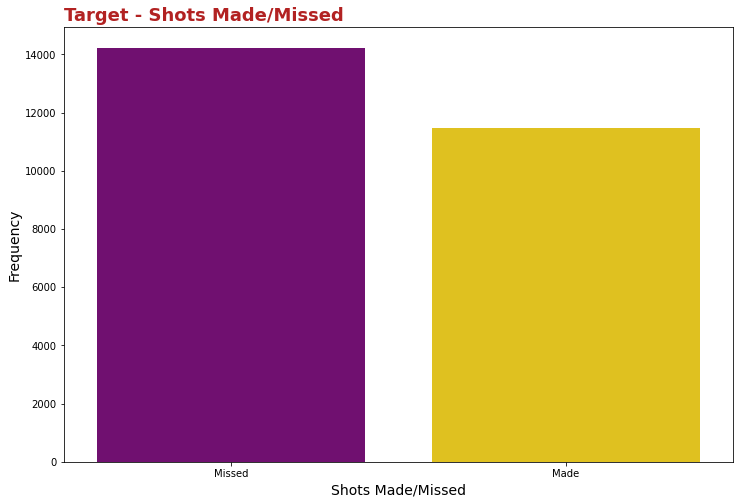

In [24]:
plt.figure(figsize=(12,8))
sns.countplot(x='shot_made_flag', data=df, palette={1:'gold', 0:'purple'})

plt.title('Target - Shots Made/Missed',
             fontsize=18, 
             fontweight='bold', 
             color='firebrick', 
             loc='left')
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Shots Made/Missed', fontsize=14)

plt.xticks([0.0, 1.0], ['Missed', 'Made'])
;

In [25]:
df.shot_made_flag.value_counts(normalize=True)

0.0    0.553839
1.0    0.446161
Name: shot_made_flag, dtype: float64

### Target - Shots Made

Observations
- The baseline is 55% as Shots Missed 